In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [5]:
import import_ipynb
from preprocess import df
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12


In [24]:

#Selecting features and target variable
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
            'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
            'Rundvekt']
X = df[features]
y = df['Art - FDIR']

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


#Making predictions
y_pred = model.predict(X_test)

#Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.6108277359729306
              precision    recall  f1-score   support

           0       0.63      0.76      0.69     11337
           1       0.56      0.42      0.48      8464

    accuracy                           0.61     19801
   macro avg       0.60      0.59      0.58     19801
weighted avg       0.60      0.61      0.60     19801



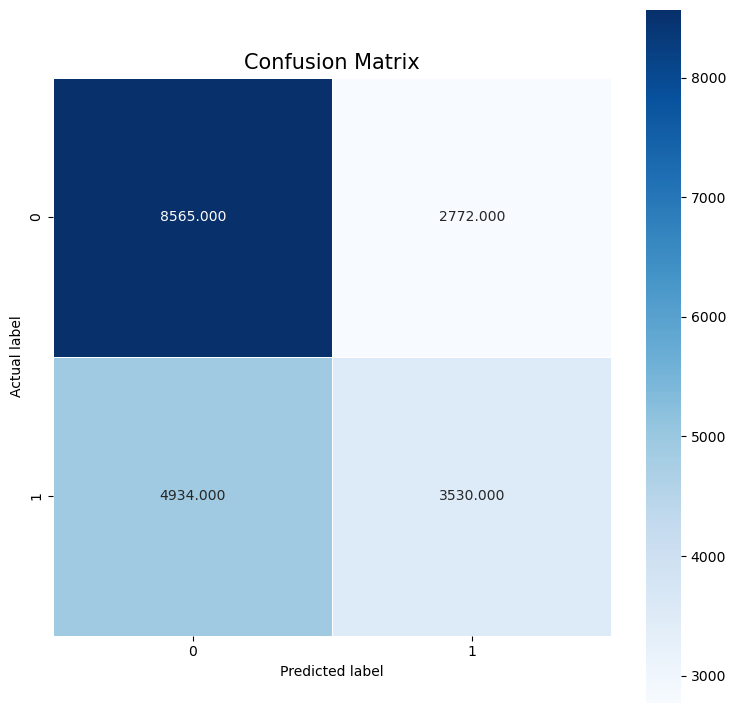

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test and y_pred are defined as in your code
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,  9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()